In [4]:

import ast
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)
import re

import time
#### Functions to import 
import used_functions as funk

INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## Variables générales

In [5]:
### retrieving the path of main directory
dirname='/home/jovyan/phD_Lens'
sourcefile='/home/jovyan/phD_Lens/sources/LockinSeedsCitingWorks.csv'
seedsfile='/home/jovyan/phD_Lens/sources/SeedsData.csv'
### out_dir variable contain the path to /OutPut directory// Update all dead data, i.e scripts output and pictures are store in the cloud. This path should be updated by user of this script if used in different architectures or to personnalize path export.
out_dir = '/home/jovyan/phD_Lens/'
print(f'Working environment is {dirname}. Data will be saved in {out_dir}.')

Working environment is /home/jovyan/phD_Lens. Data will be saved in /home/jovyan/phD_Lens/.


In [6]:
seedsDf=pd.read_csv(seedsfile)

In [7]:
seedsDf

Lens ID                                              Title  \
0  003-422-869-824-612                              THE FABLE OF THE KEYS   
1  031-620-848-395-049  Why are institutions the ‘carriers of history’...   
2  057-519-331-033-253              Path Dependence, Lock-In, and History   
3  078-422-899-116-204  Sprayed to Death: Path Dependence, Lock-in and...   
4  078-540-302-576-45X  COMPETING TECHNOLOGIES, INCREASING RETURNS, AN...   
5  120-557-893-863-777  Nuclear Power Reactors: A Study in Technologic...   
6  138-335-719-527-313                   Clio and the economics of QWERTY   
7  157-501-463-801-357  Increasing Returns and Path Dependence in the ...   

   Date Published  Publication Year Publication Type  \
0             NaN              1990  journal article   
1             NaN              1994  journal article   
2             NaN              1995  journal article   
3             NaN              1996  journal article   
4             NaN              1989  journal article   
5             NaN              1990  journal article   
6             NaN              1985              NaN   
7             NaN              1994             book   

                                      Source Title               ISSNs  \
0                 The Journal of Law and Economics  00222186; 15375285   
1          Structural Change and Economic Dynamics            0954349x   
2  The Journal of Law, Economics, and Organization  14657341; 87566222   
3                             The Economic Journal  00130133; 14680297   
4                             The Economic Journal  00130133; 14680297   
5                  The Journal of Economic History  00220507; 14716372   
6                     The American Economic Review            00028282   
7                                              NaN                 NaN   

                          Publisher  Source Country  \
0       University of Chicago Press   United States   
1                       Elsevier BV     Netherlands   
2     Oxford University Press (OUP)  United Kingdom   
3     Oxford University Press (OUP)   United States   
4     Oxford University Press (OUP)   United States   
5  Cambridge University Press (CUP)  United Kingdom   
6     American Economic Association   United States   
7                               NaN             NaN   

                                 Author/s  ... PMID  \
0  Stan J. Liebowitz; Stephen E. Margolis  ...  NaN   
1                           Paul A. David  ...  NaN   
2  Stan J. Liebowitz; Stephen E. Margolis  ...  NaN   
3               Robin Cowan; Philip Gunby  ...  NaN   
4                         W. Brian Arthur  ...  NaN   
5                             Robin Cowan  ...  NaN   
6                           Paul A. David  ...  NaN   
7                         W. Brian Arthur  ...  NaN   

                                   DOI  Microsoft Academic ID  PMCID  \
0                       10.1086/467198             3122982033    NaN   
1         10.1016/0954-349x(94)90002-7             1970677847    NaN   
2  10.1093/oxfordjournals.jleo.a036867             3124694287    NaN   
3                      10.2307/2235561             2055858377    NaN   
4                      10.2307/2234208             2129261459    NaN   
5            10.1017/s0022050700037153             2092773742    NaN   
6                                  NaN             1495886451    NaN   
7                                  NaN             2009202666    NaN   

   Citing Patents Count                                         References  \
0                     0  001-323-672-850-896; 010-868-742-674-100; 011-...   
1                     0  002-329-854-148-284; 007-476-658-028-762; 011-...   
2                     0  003-422-869-824-612; 006-931-353-953-725; 011-...   
3                     0  003-138-462-562-982; 009-077-590-222-925; 010-...   
4                     0  006-931-353-953-725; 019-559-252-236-245; 022-...   
5                     0  004-558-829-953

In [8]:
seedsDf=funk.corpus_preprocess(seedsDf)
seedsDf=funk.corpus_stat(seedsDf)
seedsDf=funk.corpus_domain(seedsDf)
seedsDf.columns

Index(['lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight', 'cited_concepts', 'cited_agri',
       'indomain'],
      dtype='object')

In [9]:
len(seedsDf)

8

In [10]:
seedsdic={'031-620-848-395-049':'''Why are institutions the ‘carriers of history’?: Path dependence and the evolution of conventions, organizations and institutions''',
          '138-335-719-527-313':'''Clio and the economics of QWERTY''',
          '078-540-302-576-45X':'''Competing Technologies, Increasing Returns, and Lock-In by Historical Events''',
          '157-501-463-801-357':'''Increasing Returns and Path Dependence in the Economy''',
          '003-422-869-824-612':'''The Fable of Keys''',
          '057-519-331-033-253':'''Path Dependence, Lock-In, and History''',
          '078-422-899-116-204':'''Sprayed to Death: Path Dependence, Lock-in and Pest Control Strategies''',
          '120-557-893-863-777':'''Nuclear Power Reactors: A Study in Technological Lock-in'''}

## Import des sources et preprocessing des données de départ
Sources import and original data preprocessing operation

In [11]:
%%time
fullcorp=pd.read_csv(sourcefile)
fullcorp=fullcorp[~fullcorp['Lens ID'].isin(list(seedsdic.keys()))]

CPU times: user 483 ms, sys: 84.4 ms, total: 567 ms
Wall time: 602 ms


In [12]:
len(fullcorp)

12313

In [13]:
fullcorp.columns

Index(['Lens ID', 'Title', 'Date Published', 'Publication Year',
       'Publication Type', 'Source Title', 'ISSNs', 'Publisher',
       'Source Country', 'Author/s', 'Abstract', 'Volume', 'Issue Number',
       'Start Page', 'End Page', 'Fields of Study', 'Keywords', 'MeSH Terms',
       'Chemicals', 'Funding', 'Source URLs', 'External URL', 'PMID', 'DOI',
       'Microsoft Academic ID', 'PMCID', 'Citing Patents Count', 'References',
       'Citing Works Count', 'Is Open Access', 'Open Access License',
       'Open Access Colour'],
      dtype='object')

In [14]:
fullcorp=funk.corpus_preprocess(fullcorp)

In [15]:
len(fullcorp)

8949

In [16]:
fullcorp=funk.corpus_stat(fullcorp)

In [17]:
len(fullcorp)

8949

In [18]:
fullcorp.columns

Index(['lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight'],
      dtype='object')

In [19]:
fullcorp.head()

lens_id                                              title  \
1054  012-417-422-262-203               Zwischen Pfadabhängigkeit und Wandel   
2362  029-755-785-265-410  Zvi Griliches and the Economics of Technology ...   
5232  072-454-739-072-183  Zur Dynamisierung Organisational Kompetenzen —...   
7299  113-008-832-530-076  Zróżnicowanie ścieżek transformacji krajów Eur...   
9638  180-942-574-629-868  Znaczenie pozarolniczej działalności gospodarc...   

     publication_type                                           abstract  \
1054             book  Der „Governance“-Begriff hat in der Politikwis...   
2362              NaN  The scientific legacy of Zvi Griliches' contri...   
5232  journal article  Die „Dynamische Kompetenz“ von Organisationen ...   
7299  journal article  Streszczenie Zainicjowany ponad cwierc wieku t...   
9638              NaN                                                NaN   

                                               text_dat  \
1054  Zwischen Pfadabhängigkeit und Wandel. Der „Gov...   
2362  Zvi Griliches and the Economics of Technology ...   
5232  Zur Dynamisierung Organisational Kompetenzen —...   
7299  Zróżnicowanie ścieżek transformacji krajów Eur...   
9638  Znaczenie pozarolniczej działalności gospodarc...   

                                           source_title    year month day  \
1054            Endspiel des Kooperativen Kapitalismus?  2006.0     1   1   
2362                       Research Papers in Economics    2015    04  01   
5232  Schmalenbachs Zeitschrift für betriebswirtscha...  2006.0     1   1   
7299                        Optimum. Studia Ekonomiczne  2015.0     1   1   
9638                                                NaN  2014.0     1   1   

                              doi                           authors  \
1054  10.1007/978-3-531-90522-8_2                      Susanne Lütz   
2362                          NaN                     Paul A. David   
5232           10.1007/bf03371661  Georg Schreyögg; Martina Kliesch   
7299   10.15290/ose.2015.01.73.02          Joanna Dzionek-Kozłowska   
9638                          NaN                     Dariusz Zając   

                               auth_list  \
1054                      [Susanne Lütz]   
2362                     [Paul A. David]   
5232  [Georg Schreyögg, Martina Kliesch]   
7299          [Joanna Dzionek-Kozłowska]   
9638                     [Dariusz Zając]   

                                                 fields  \
1054                                                NaN   
2362  Total factor productivity; Neoclassical econom...   
5232                      Humanities; Political science   
7299                       Economy; Geography; Theology   
9638  Business; Rural development; Business activiti...   

                                             references  \
1054  000-742-487-988-420; 000-776-779-523-583; 001-...   
2362  006-931-353-953-725; 007-577-823-729-662; 008-...   
5232  003-266-938-919-227; 004-699-534-320-672; 006-...   
7299  003-422-869-824-612; 004-173-301-368-732; 013-...   
9638  001-745-456-050-173; 011-240-092-430-341; 011-...   

                                               ref_list  \
1054  [000-742-487-988-420, 000-776-779-523-583, 001...   
2362  [006-931-353-953-725, 007-577-823-729-662, 008...   
5232  [003-266-938-919-227, 004-699-534-320-672, 006...   
7299  [003-422-869-824-612, 004-173-301-368-732, 013...   
9638  [001-745-456-050-173, 011-240-092-430-341, 011...   

      scholarly_citations_count  nb_ref  nb_cited_tf  tf_weight  
1054                          4      80            1      0.013  
2362                          3      81            1      0.012  
5232                         10      72            1      0.014  
7299                          1      31            3      0.097  
9638                          2      97            1      0.010

In [20]:
%%time
fullcorp=funk.corpus_domain(fullcorp)

CPU times: user 435 ms, sys: 1.71 s, total: 2.14 s
Wall time: 1min 26s


In [21]:
len(fullcorp)

8949

<AxesSubplot:>

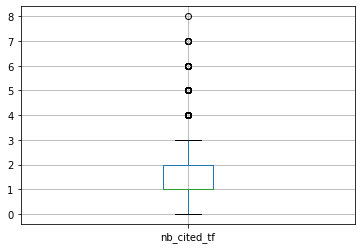

In [22]:
fullcorp.boxplot(column=['nb_cited_tf'])  

In [29]:
fullcorp.groupby('nb_cited_tf').size().to_frame('Effectifs').sort_values(by='nb_cited_tf', ascending=True).reset_index()

nb_cited_tf  Effectifs
0            0          3
1            1       6570
2            2       1690
3            3        457
4            4        149
5            5         60
6            6         14
7            7          5
8            8          1

On construit l'ensemble $\alpha$, ou ensemble coeur, qui comprend l'ensemble des publications scientifiques pour lesquelles nous avons pu extraire un monomgramme ou un bigramme nominal se référant à la fois au domaine agricole et aux concepts fondateurs des théories du verrouillage technologique cf.

In [23]:
len(fullcorp[fullcorp.scholarly_citations_count == 0])

0

In [26]:
len(fullcorp[fullcorp.nb_cited_tf >=2])

2376

In [27]:
alphaseeds=pd.concat([fullcorp[fullcorp.indomain ==1],seedsDf[seedsDf['lens_id']=='078-422-899-116-204']])
alphaseeds.loc[alphaseeds.index==3,'indomain']=1

In [28]:
len(alphaseeds[alphaseeds.nb_cited_tf >=2])

48

In [30]:
alphaseeds[(alphaseeds.title.isna()) & (alphaseeds.abstract.notna())]

Empty DataFrame
Columns: [lens_id, title, publication_type, abstract, text_dat, source_title, year, month, day, doi, authors, auth_list, fields, references, ref_list, scholarly_citations_count, nb_ref, nb_cited_tf, tf_weight, cited_concepts, cited_agri, indomain]
Index: []

[0 rows x 22 columns]

Pour être certain que les données qui seront récupérées à la fin du processus itératif sont dans le scope de la recherche, l'ensemble des titres abstracts de $\alpha$ est relu: ne sont gardés que les publications dans le scope (selectedseeds) 

In [31]:
unwantedseeds=['024-577-503-089-252','114-267-676-495-223','042-064-103-996-821','014-686-905-003-693','108-162-921-677-71X','054-662-057-787-708','022-826-596-850-865','076-328-857-813-366','017-331-666-306-588','147-873-320-127-160']

In [32]:
alphaseeds_select=alphaseeds[(alphaseeds.nb_cited_tf >=2) & (~alphaseeds.lens_id.isin(unwantedseeds))]
print(len(alphaseeds_select))

39


<AxesSubplot:>

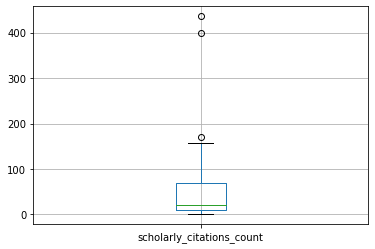

In [33]:
core_citDf=alphaseeds_select.groupby('scholarly_citations_count').size().to_frame('Effectifs').sort_values(by='scholarly_citations_count',ascending=False).reset_index()
core_citDf.boxplot('scholarly_citations_count')

Une fois l'ensemble $\alpha$ délimité et nettoyé, on récupère l'ensemble des publications issues des listes bibliographiques des publications référencées par $\alpha$. Cet ensemble de références constituera l'ensemble intermédiaire à partir duquel seront récupérées les publications qui viendront augmenter le corpus de départ.

In [34]:
len(alphaseeds_select)

39

In [35]:
undupcitedref=[ref for x in alphaseeds_select.ref_list.to_list() for ref in x]
citedref=list(dict.fromkeys(undupcitedref))
len(citedref)

1903

$\alpha$ référence 1903 publications scientifiques uniques (références sortantes). Ces références qui vont constituer le corpus intermédiaire $\beta$ doivent être enrichies: on doit récupérer les métadonnées dont on ne dispose pas pour l'instant. 

In [36]:
%%time
ci_lensjsons=funk.get_lensmeta(citedref)
ci_iter0=funk.lens_parser(ci_lensjsons)


500
500
499
403
CPU times: user 2.17 s, sys: 33.1 ms, total: 2.21 s
Wall time: 40.7 s


In [37]:
print(len(ci_iter0))

1902


In [38]:
ci_iter0=funk.corpus_preprocess(ci_iter0)
ci_iter0=funk.corpus_stat(ci_iter0,True,alphaseeds_select)
len(ci_iter0)

1400

In [39]:
%%time
ci_iter0=funk.corpus_domain(ci_iter0)

CPU times: user 273 ms, sys: 1.95 s, total: 2.22 s
Wall time: 15.9 s


In [40]:
len(ci_iter0)

1400

In [41]:
ci_iter0.columns

Index(['lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight', 'nb_cited_core_seeds', 'lcs_core',
       'spscore', 'cited_concepts', 'cited_agri', 'indomain'],
      dtype='object')

In [42]:
len(ci_iter0[ci_iter0.indomain==1])

32

In [56]:
tbl3=ci_iter0.groupby('lcs_core').size().to_frame('Effectifs').sort_values(by='lcs_core',ascending=False).reset_index()

In [57]:
vals=[]
for index,row in tbl3.iterrows():
    eff=len(ci_iter0[ci_iter0.lcs_core==row['lcs_core']]) 
    conc=len(ci_iter0[(ci_iter0.lcs_core==row['lcs_core']) & (ci_iter0.cited_concepts!=0)])
    agri=len(ci_iter0[(ci_iter0.lcs_core==row['lcs_core']) & (ci_iter0.cited_agri!=0)])
    indom=len(ci_iter0[(ci_iter0.lcs_core==row['lcs_core']) & (ci_iter0.indomain!=0)])
    vals.append((row['lcs_core'],eff,conc,agri,indom))
tbl3=pd.DataFrame(data=vals, columns=['Nb. cit. locale','Nb. publications','Terme concept','Terme agri.','Domaine'])
print(tbl3.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Nb. cit. locale &  Nb. publications &  Terme concept &  Terme agri. &  Domaine \\
\midrule
0  &               31 &                 1 &              1 &            0 &        0 \\
1  &               27 &                 1 &              1 &            1 &        1 \\
2  &               20 &                 1 &              0 &            0 &        0 \\
3  &               15 &                 1 &              1 &            1 &        1 \\
4  &               13 &                 1 &              1 &            1 &        1 \\
5  &               12 &                 1 &              1 &            0 &        0 \\
6  &               11 &                 1 &              1 &            1 &        1 \\
7  &               10 &                 1 &              1 &            0 &        0 \\
8  &                7 &                 3 &              2 &            0 &        0 \\
9  &                6 &                 4 &              3 &            2 &   

/tmp/ipykernel_48/2779643853.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tbl3.to_latex())


<AxesSubplot:>

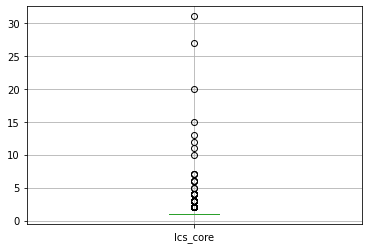

In [58]:
ci_iter0.boxplot('lcs_core')

In [59]:
specificity_ci0=ci_iter0.groupby('spscore').size().to_frame('effectifs').sort_values(by='spscore',ascending=False).reset_index()
specificity_ci0['effectifs cumulés']=specificity_ci0.effectifs.cumsum()
specificity_ci0.head(10)

spscore  effectifs  effectifs cumulés
0    1.000          7                  7
1    0.500          6                 13
2    0.333         11                 24
3    0.273          1                 25
4    0.250         16                 41
5    0.222          1                 42
6    0.200         14                 56
7    0.182          2                 58
8    0.167          9                 67
9    0.143         11                 78

In [35]:
retdat=[]
for lcs in np.unique(ci_iter0.lcs_core.to_list()):
    effectifs=len(ci_iter0[ci_iter0.lcs_core == lcs])
    indom=len(ci_iter0[(ci_iter0.lcs_core == lcs) & (ci_iter0.indomain == 1)])
    wconc=len(ci_iter0[(ci_iter0.lcs_core == lcs) & (ci_iter0.cited_concepts != 0)])
    wagri=len(ci_iter0[(ci_iter0.lcs_core == lcs) & (ci_iter0.cited_agri != 0)])
    corpart=round((effectifs/len(ci_iter0))*100,2)
    percent=round((indom/effectifs)*100,2)
    retdat.append((lcs,effectifs,wconc,wagri,indom))
generDf=pd.DataFrame(data=retdat,columns=['Local Citation Score','Nb. Publications','Nb. Pub. Concept','Nb. Pub. Agri','Nb. Pub. Domaine'])


In [36]:
generDf.sort_values(by='Local Citation Score',ascending=False)

Local Citation Score  Nb. Publications  Nb. Pub. Concept  Nb. Pub. Agri  \
14                    31                 1                 1              0   
13                    27                 1                 1              1   
12                    20                 1                 0              0   
11                    15                 1                 1              1   
10                    13                 1                 1              1   
9                     12                 1                 1              0   
8                     11                 1                 1              1   
7                     10                 1                 1              0   
6                      7                 3                 2              0   
5                      6                 4                 3              2   
4                      5                 2                 1              1   
3                      4                 8                 6              3   
2                      3                19                 3             13   
1                      2                86                16             51   
0                      1              1271                64            703   

    Nb. Pub. Domaine  
14                 0  
13                 1  
12                 0  
11                 1  
10                 1  
9                  0  
8                  1  
7                  0  
6                  0  
5                  2  
4                  1  
3                  2  
2                  1  
1                  8  
0                 14

In [37]:
print(generDf.sort_values(by='Local Citation Score',ascending=False).to_latex(index=False, float_format="{:.1f}".format))

\begin{tabular}{rrrrr}
\toprule
 Local Citation Score &  Nb. Publications &  Nb. Pub. Concept &  Nb. Pub. Agri &  Nb. Pub. Domaine \\
\midrule
                   31 &                 1 &                 1 &              0 &                 0 \\
                   27 &                 1 &                 1 &              1 &                 1 \\
                   20 &                 1 &                 0 &              0 &                 0 \\
                   15 &                 1 &                 1 &              1 &                 1 \\
                   13 &                 1 &                 1 &              1 &                 1 \\
                   12 &                 1 &                 1 &              0 &                 0 \\
                   11 &                 1 &                 1 &              1 &                 1 \\
                   10 &                 1 &                 1 &              0 &                 0 \\
                    7 &                 3

/tmp/ipykernel_76558/1444319365.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(generDf.sort_values(by='Local Citation Score',ascending=False).to_latex(index=False, float_format="{:.1f}".format))


In [60]:
ci_iter0_select=ci_iter0[ci_iter0.indomain==1]

print(len(ci_iter0_select))

32


In [61]:
ci_iter0_select.lens_id.to_list()

['046-766-508-337-383',
 '086-521-055-488-482',
 '126-443-231-832-843',
 '088-022-496-676-098',
 '032-803-871-869-204',
 '023-197-236-631-391',
 '080-590-126-689-320',
 '032-165-108-725-22X',
 '113-539-412-402-847',
 '003-866-373-184-153',
 '060-672-387-979-952',
 '078-422-899-116-204',
 '155-376-358-159-689',
 '186-491-464-291-630',
 '073-960-712-766-685',
 '030-556-828-747-078',
 '161-858-228-065-368',
 '070-364-061-118-35X',
 '018-268-254-122-624',
 '015-080-244-066-266',
 '007-146-861-011-016',
 '006-090-528-672-420',
 '138-287-678-198-504',
 '074-545-741-043-644',
 '141-521-933-152-812',
 '057-442-933-223-481',
 '024-066-410-726-06X',
 '057-843-885-326-343',
 '062-561-947-839-386',
 '023-976-368-456-727',
 '098-481-504-964-379',
 '039-458-451-968-441']

In [39]:
ci_citDf=ci_iter0_select.groupby('scholarly_citations_count').size().to_frame('Effectifs').sort_values(by='scholarly_citations_count',ascending=False).reset_index()
ci_citDf

scholarly_citations_count  Effectifs
0                        4293          1
1                        2251          1
2                         725          1
3                         454          1
4                         409          1
5                         325          1
6                         194          1
7                         171          1
8                         148          1
9                         147          1
10                        141          2
11                        138          1
12                        133          1
13                        107          1
14                         80          1
15                         59          1
16                         54          1
17                         44          1
18                         40          1
19                         38          1
20                         37          1
21                         28          1
22                         25          1
23                         19          1
24                         18          1
25                         17          1
26                         11          1
27                         10          1
28                          9          1
29                          6          1
30                          4          1

In [39]:
ci_iter0_alter=ci_iter0[ci_iter0.spscore >= 0.25]

Construction de l'ensemble $\omega$, rassemblant les publications scientifiques citantes les publications présentes dans $\beta$

In [62]:
%%time
lensjsons=[]
for lid in ci_iter0_select.lens_id.to_list():
    if lid !=  '077-668-643-936-608':
        try:
            temp=funk.get_lensciting(lid)
            for x in temp:
                lensjsons.append(x)
        except:
            print(lid)
            break

CPU times: user 2.95 s, sys: 667 ms, total: 3.62 s
Wall time: 4min 10s


In [63]:
#%%time
#lensjsons=[]
#for lid in ci_iter0_alter.lens_id.to_list():
#    temp=funk.get_lensciting(lid)
#    for x in temp:
#        lensjsons.append(x)
        

In [76]:
cf_iter0=funk.lens_parser(lensjsons)
len(cf_iter0)

10263

In [77]:
#cf_iter0

In [78]:
cf_iter0=funk.corpus_preprocess(cf_iter0)
cf_iter0=funk.corpus_stat(cf_iter0,False,ci_iter0_select)

In [79]:
%%time
cf_iter0=funk.corpus_domain(cf_iter0)




CPU times: user 473 ms, sys: 3.65 s, total: 4.12 s
Wall time: 1min 24s


In [80]:
# omega['title_clean']=omega.title.str.lower().apply(lambda x: funk.cleaner(x))
# omega=omega.drop_duplicates(subset='title_clean').copy()
len(cf_iter0)

7606

In [81]:
len(cf_iter0[cf_iter0.indomain==1])

104

In [82]:
cf_iter0_select=cf_iter0[(cf_iter0.indomain==1) & (cf_iter0.BC>=2)]

In [83]:
len(cf_iter0_select)

56

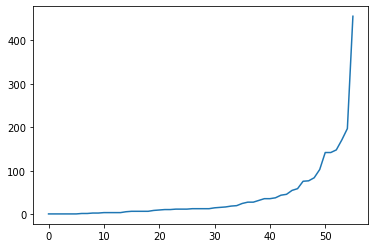

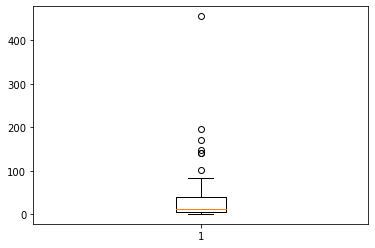

In [84]:
funk.get_distrib(cf_iter0_select,'scholarly_citations_count',True)

In [85]:
print(f'Core Corpus is of Length: {len(alphaseeds_select)}')
print(f'Intermediary Corpus is of Length: {len(ci_iter0_select)}')
print(f'Final Corpus is of Length: {len(cf_iter0_select)}')
print(f'Mean Bibliographic Coupling between Core and Final is: {cf_iter0_select.BC.mean()}')
print(f'Overlap between final corpus and core corpus: {funk.set_ncs(cf_iter0_select,alphaseeds_select,True,True)}')
print(f'Normalise coupling strenth with overlap: {funk.set_ncs(cf_iter0_select,alphaseeds_select,True)}')
print(f'Normalise coupling strenth without overlap: {funk.set_ncs(cf_iter0_select,alphaseeds_select,False)}')


Core Corpus is of Length: 39
Intermediary Corpus is of Length: 32
Final Corpus is of Length: 56
Mean Bibliographic Coupling between Core and Final is: 3.642857142857143
Overlap between final corpus and core corpus: 25
Normalise coupling strenth with overlap: 0.573
Normalise coupling strenth without overlap: 0.099


In [86]:

print(cf_iter0_select.BC.mean())

3.642857142857143


<AxesSubplot:>

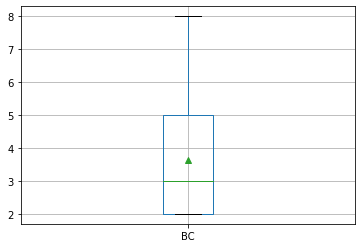

In [90]:
cf_iter0_select.boxplot('BC',showmeans=True, showfliers=True)

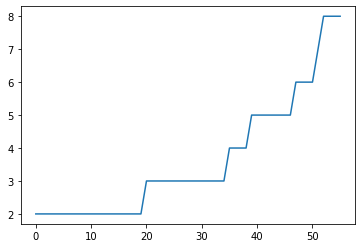

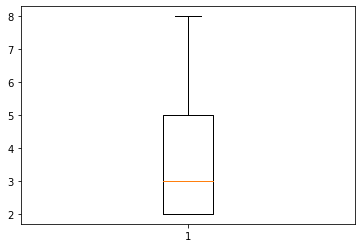

In [87]:
funk.get_distrib(cf_iter0_select,'BC',True)

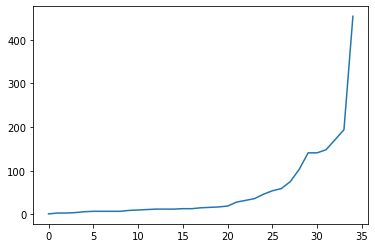

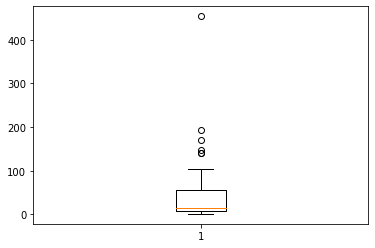

In [51]:
funk.get_distrib(cf_iter0_select,'scholarly_citations_count',True)

-------------------

Itération de la méthode

In [52]:
# omegafilteredp=omega_domain[['lens_id', 'title', 'publication_type', 'abstract','ref_list',
#        'scholarly_citations_count', 'auth_list', 'year',
#        'doi', 'fields', 'source_title']].copy()
# alphaseedsp=alphaseeds[['Lens ID', 'Title', 'Publication Type', 'Abstract', 'ref_list',
#        'Citing Works Count', 'auth_list', 'Publication Year',
#        'DOI', 'Fields of Study', 'Source Title']]
#alphaseeds=alphaseeds.rename(columns={'Publication Type':'publication_type','Citing Works Count':'scholarly_citations_count','Publication Year':'year','DOI':'doi','Fields of Study':'fields','Source Title':'source_title'})

core_iter1 = pd.concat([alphaseeds_select,cf_iter0_select])
print(len(core_iter1))
print(len(core_iter1.drop_duplicates(subset='lens_id')))
core_iter1=core_iter1.drop_duplicates(subset='lens_id')

74
55


In [53]:
core_iter1.columns

Index(['lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight', 'cited_concepts', 'cited_agri',
       'indomain', 'BC', 'lcs_ci', 'spscore_ci'],
      dtype='object')

Iteration-1: récupération des publications et de leur metadata

In [54]:
undupcitedref=[ref for x in core_iter1.ref_list.to_list() for ref in x]
cited=list(dict.fromkeys(undupcitedref))
len(cited)

2537

In [55]:
%%time
lensiterjsons=funk.get_lensmeta(cited)


500
500
499
500
500
37
CPU times: user 244 ms, sys: 73.4 ms, total: 317 ms
Wall time: 46.8 s


In [56]:
%%time

ci_iter1=funk.lens_parser(lensiterjsons)
print(len(ci_iter1))
ci_iter1=funk.corpus_preprocess(ci_iter1)
print(len(ci_iter1))
ci_iter1=funk.corpus_stat(ci_iter1,True,core_iter1)
print(len(ci_iter1))

2536
1952
1951
CPU times: user 3.03 s, sys: 198 ms, total: 3.22 s
Wall time: 3.18 s


In [57]:
ci_iter1=funk.corpus_domain(ci_iter1)
len(ci_iter1)

1951

In [58]:
ci_iter1_select=ci_iter1[ci_iter1.indomain==1].copy()
print(len(ci_iter1_select))

49


In [59]:
print(f'There is {len([x for x in ci_iter1_select.lens_id.to_list() if x in core_iter1.lens_id.to_list()])} publication in delta that are present in alpha')

There is 29 publication in delta that are present in alpha


In [60]:
%%time
omegajsons=[]
for lid in ci_iter1_select.lens_id.to_list():
    if lid !=  '077-668-643-936-608':
        try:
            temp=funk.get_lensciting(lid)
            for x in temp:
                omegajsons.append(x)
        except:
            print(lid)
            break



CPU times: user 3.73 s, sys: 730 ms, total: 4.46 s
Wall time: 5min 46s


In [61]:
cf_iter1=funk.lens_parser(omegajsons)

len(cf_iter1)

10828

In [62]:
cf_iter1=funk.corpus_preprocess(cf_iter1)
cf_iter1=funk.corpus_stat(cf_iter1,False,ci_iter1_select)
print(len(cf_iter1))

7893


In [63]:
%%time
cf_iter1=funk.corpus_domain(cf_iter1)
print(len(cf_iter1))

7893
CPU times: user 533 ms, sys: 4.15 s, total: 4.69 s
Wall time: 1min 34s


In [64]:
len(cf_iter1.drop_duplicates(subset=['lens_id']))

7893

In [65]:
len(cf_iter1[~cf_iter1.lens_id.isin(core_iter1.lens_id.to_list())])

7846

In [66]:
%%time
cf_iter1.columns

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


Index(['lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight', 'BC', 'lcs_ci', 'spscore_ci',
       'cited_concepts', 'cited_agri', 'indomain'],
      dtype='object')

In [67]:

cf_iter1_select=cf_iter1[(cf_iter1.indomain==1) & (cf_iter1.BC>=3)].copy()
print(len(cf_iter1_select))

40


In [68]:
print(f'Core Corpus is of Length: {len(core_iter1)}')
print(f'Intermediary Corpus is of Length: {len(ci_iter1_select)}')
print(f'Final Corpus is of Length: {len(cf_iter1_select)}')
print(f'Mean Bibliographic Coupling between Core and Final is: {cf_iter1_select.BC.mean()}')

print(f'Overlap between final corpus and core corpus: {funk.set_ncs(cf_iter1_select,core_iter1,True,True)}')
print(f'Normalise coupling strenth with overlap: {funk.set_ncs(cf_iter1_select,core_iter1,True)}')
print(f'Normalise coupling strenth without overlap: {funk.set_ncs(cf_iter1_select,core_iter1,False)}')

Core Corpus is of Length: 55
Intermediary Corpus is of Length: 49
Final Corpus is of Length: 40
Mean Bibliographic Coupling between Core and Final is: 5.0
Overlap between final corpus and core corpus: 35
Normalise coupling strenth with overlap: 0.747
Normalise coupling strenth without overlap: 0.05


In [69]:
print(len(cf_iter1_select[cf_iter1_select.lens_id.isin(core_iter1.lens_id.to_list())]))
print(cf_iter1_select.BC.mean())

35
5.0


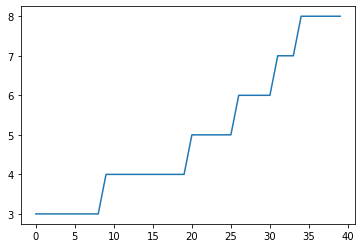

In [70]:
funk.get_distrib(cf_iter1_select,'BC',True)

In [71]:
funk.get_distrib(cf_iter1_select,'scholarly_citations_count',True)

------------

Troisième itération

In [72]:
cf_iter1_select

lens_id                                              title  \
451   086-521-055-488-482  Why are grain-legumes rarely present in croppi...   
581   126-443-231-832-843  Why are ecological, low-input, multi-resistant...   
2083  114-267-676-495-223  Unlocking "lock-in" and path dependency: A rev...   
957   032-803-871-869-204  Triggering change: Towards a conceptualisation...   
1466  063-400-250-971-95X  Transitions through the dynamics of adaptive c...   
927   011-565-007-988-400  Transitional pathways towards input reduction ...   
761   023-197-236-631-391  Transition to legume-based farming systems req...   
1348  085-434-095-225-749  Tracking down coupled innovations supporting a...   
1495  195-171-735-137-55X  The politics of expertise in assessing alterna...   
773   032-165-108-725-22X  The need for policy to address the food system...   
544   113-539-412-402-847  The influence of Economics on agricultural sys...   
147   023-446-939-849-631  Technological Lock-In and Pathways for Crop Di...   
938   015-948-030-986-060  Systemic ethics and inclusive governance: two ...   
987   060-672-387-979-952  Sustainability transitions: Insights on proces...   
609   138-326-798-742-518  Socioeconomic Challenges of California Strawbe...   
388   073-960-712-766-685  Socio-technical lock-in hinders crop diversifi...   
80    013-160-801-537-807  Pulses for Sustainability: Breaking Agricultur...   
862   094-509-877-560-461  Peer-Reviewed Literature on Grain Legume Speci...   
9741  022-965-674-837-878  Path dependencies in Norwegian dairy and beef ...   
1221  158-987-370-926-889  Multifunctionality and path dependence: Farmer...   
38    007-146-861-011-016  Modeling Path Dependence in Agricultural Adapt...   
858   090-440-393-881-498  Locked-in or ready for climate change mitigati...   
1185  099-193-167-889-653  Lock-ins to transition pathways anchored in co...   
881   124-419-426-563-150  Lock-ins to the dissemination of genetically i...   
1023  106-581-485-846-655  Lock-ins and Agency: Towards an Embedded Appro...   
29    006-090-528-672-420  Innovations developed within supply chains hin...   
735   008-109-612-636-705  Identifying barriers to sustainable apple prod...   
998   074-545-741-043-644  How do stakeholder interactions in Cambodian r...   
619   141-521-933-152-812  How agricultural research systems shape a tech...   
860   093-126-625-381-083  Goal frames and sustainability transitions: ho...   
1246  007-052-186-106-603  Five mechanisms blocking the transition toward...   
629   146-605-720-695-696  Farmer intentional pathways for net zero carbo...   
732   005-534-623-372-977  Fair Trade Milk Initiative in Belgium: Bricola...   
1869  024-066-410-726-06X  Do field-level practices of Cambodian farmers ...   
384   072-386-730-348-663  Conceptualising Disruptions in British Beef an...   
1134  060-280-422-720-020  Coexistence of Cooperative Models as Structura...   
637   150-451-553-802-479  Beyond a bottle of liquid: pesticide dependenc...   
1029  121-679-177-261-558  Barriers to implementing climate resilient agr...   
1340  023-976-368-456-727  Analyzing barriers and levers for practice cha...   
6762  011-917-002-929-23X  A Mini-Review on Overcoming a Calorie-Centric ...   

     publication_type                                           abstract  \
451   journal article                                                n/a   
581   journal article  The use of multi-resistant cultivars allows a ...   
2083  journal article  Introduced in the early 2000s, the concept of ...   
957   journal article  In this paper, we present a broad conceptualis...   
1466  journal article  The escalating sustainability problems of the ...   
927   journal article  Reducing the use of pesticides and fertilizers...   
761   journal article  Legume cultivation has been declining for seve...   
1348  journal article  High pesticide use causes environmental and hu...   
1495  journal article  Transitions to sustainability 

In [73]:
core_iter2=pd.concat([core_iter1,cf_iter1_select])
core_iter2=core_iter2.drop_duplicates(subset='lens_id').reset_index()
print(f'New core at second iteration is of length {len(core_iter2)}')

New core at second iteration is of length 60


In [74]:
%%time
undupcitedref=[ref for x in core_iter2.ref_list.to_list() for ref in x]
cited_iter=list(dict.fromkeys(undupcitedref))
print(f'The second core iter counts {len(cited_iter)} publications to retrieve')

lensiterjsonsiter=funk.get_lensmeta(cited_iter)

The second core iter counts 2739 publications to retrieve
500
500
499
500
500
239
CPU times: user 225 ms, sys: 91.8 ms, total: 316 ms
Wall time: 44.3 s


In [75]:
ci_iter2=funk.lens_parser(lensiterjsonsiter)
len(ci_iter2)

2738

In [76]:
ci_iter2=funk.corpus_preprocess(ci_iter2)
print(len(ci_iter2))
ci_iter2=funk.corpus_stat(ci_iter2,True,core_iter2)
print(len(ci_iter2))

2143
2142


In [77]:
ci_iter2=funk.corpus_domain(ci_iter2)
len(ci_iter2)

2142

In [78]:
ci_iter2_select=ci_iter2[ci_iter2.indomain==1].copy()
print(len(ci_iter2_select))
print(f'There is {len([x for x in ci_iter2_select.lens_id.to_list() if x in core_iter2.lens_id.to_list()])} publication in delta that are present in alpha')

53
There is 29 publication in delta that are present in alpha


In [79]:
%%time
omegajsonsiter=[]
for lid in ci_iter2_select.lens_id.to_list():
     if lid !=  '077-668-643-936-608':
        try:
            temp=funk.get_lensciting(lid)
            for x in temp:
                omegajsonsiter.append(x)
        except:
            print(lid)
            break

omega_iter_iter=funk.lens_parser(omegajsonsiter)

len(omega_iter_iter)

CPU times: user 13.5 s, sys: 1.21 s, total: 14.8 s
Wall time: 6min 14s


10894

In [80]:
cf_iter2=funk.lens_parser(omegajsonsiter)
print(len(cf_iter2))

10894


In [81]:
%%time

cf_iter2=funk.corpus_preprocess(cf_iter2)
print(len(cf_iter2))
cf_iter2=funk.corpus_stat(cf_iter2,False,ci_iter2_select)
print(len(cf_iter2))

7933
7933
CPU times: user 4.21 s, sys: 34.7 ms, total: 4.25 s
Wall time: 4.25 s


In [82]:
%%time
cf_iter2=funk.corpus_domain(cf_iter2)
print(len(cf_iter2))

7933
CPU times: user 652 ms, sys: 5.68 s, total: 6.34 s
Wall time: 1min 34s


In [83]:
len(cf_iter2.drop_duplicates(subset='lens_id'))

7933

In [84]:
print(len(cf_iter2[cf_iter2.lens_id.isin(core_iter2.lens_id.to_list())]))

52


In [85]:
%%time
print(len(cf_iter2[cf_iter2.BC>=2]))
print(len(cf_iter2[cf_iter2.indomain==1]))
print(len(cf_iter2[(cf_iter2.BC>=2) & (cf_iter2.indomain==1)]))
      


399
111
61
CPU times: user 2.21 ms, sys: 1.09 ms, total: 3.29 ms
Wall time: 2.74 ms


In [86]:
cf_iter2_select=cf_iter2[(cf_iter2.indomain==1) & (cf_iter2.BC>=3)].copy()

In [87]:
cf_iter2_select.columns

Index(['lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight', 'BC', 'lcs_ci', 'spscore_ci',
       'cited_concepts', 'cited_agri', 'indomain'],
      dtype='object')

In [88]:
print(f'Core Corpus is of Length: {len(core_iter2)}')
print(f'Intermediary Corpus is of Length: {len(ci_iter2_select)}')
print(f'Final Corpus is of Length: {len(cf_iter2_select)}')
print(f'Mean Bibliographic Coupling between Core and Final is: {cf_iter2_select.BC.mean()}')

print(f'Overlap between final corpus and core corpus: {funk.set_ncs(cf_iter2_select,core_iter2,True,True)}')
print(f'Normalise coupling strenth with overlap: {funk.set_ncs(cf_iter2_select,core_iter2,True)}')
print(f'Normalise coupling strenth without overlap: {funk.set_ncs(cf_iter2_select,core_iter2,False)}')

Core Corpus is of Length: 60
Intermediary Corpus is of Length: 53
Final Corpus is of Length: 40
Mean Bibliographic Coupling between Core and Final is: 5.1
Overlap between final corpus and core corpus: 40
Normalise coupling strenth with overlap: 0.81


ZeroDivisionError: float division by zero

In [ ]:
print(len(cf_iter2_select[cf_iter2_select.lens_id.isin(core_iter2.lens_id.to_list())]))
print(cf_iter2_select.BC.mean())

In [ ]:
funk.get_distrib(cf_iter2_select,'BC',True)

In [ ]:
funk.get_distrib(cf_iter2_select,'scholarly_citations_count',True)

In [ ]:
cf_iter2_select.scholarly_citations_count.min()

In [ ]:
###### Save Results

In [89]:

finaldf=pd.concat([core_iter2,cf_iter2_select])
print(len(finaldf))
finaldf=finaldf.drop_duplicates(subset='lens_id')
#finaldf=finaldf.drop(columns=['index'])
print(len(finaldf))
print(finaldf.columns)

100
60
Index(['index', 'lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight', 'cited_concepts', 'cited_agri',
       'indomain', 'BC', 'lcs_ci', 'spscore_ci'],
      dtype='object')


In [90]:
finaldf=finaldf.drop(columns=['index'])

In [91]:
finaldf['txt_dat']=finaldf.apply(lambda row: str(row['title']+'. '+str(row['abstract'])) if type(row['abstract']) != float else str(row['title']) ,axis=1)

In [92]:
finaldf['txt_tokens']=finaldf.txt_dat.apply(lambda x: funk.text_extraction(x))
finaldf['txt_bigrams']=finaldf.txt_dat.apply(lambda x: funk.text_extraction(x,True))

In [93]:
%%time
finaldf['unigram_agri']=finaldf.txt_tokens.apply(lambda x: funk.agrispec(x))
finaldf['bigram_agri']=finaldf.txt_bigrams.apply(lambda x: funk.agrispec(x))
finaldf['unigram_concept']=finaldf.txt_tokens.apply(lambda x: funk.specific(x))
finaldf['bigram_concept']=finaldf.txt_bigrams.apply(lambda x: funk.specific(x))

CPU times: user 35.1 ms, sys: 3.57 ms, total: 38.7 ms
Wall time: 37.5 ms


In [94]:
alluniconc=[z for x in finaldf[finaldf.unigram_concept != 0].unigram_concept.to_list() for z in x]
allbiconc=[z for x in finaldf[finaldf.bigram_concept != 0].bigram_concept.to_list() for z in x]

In [95]:
def concept_error(ngram):
    if ngram != 0:
        temp=[x for x in ngram if re.search('flock|fetlock',x)]
        if len(temp) >= 1:
            return 0
        else:
            return 1
    else:
        return 0

In [96]:
finaldf.columns

Index(['lens_id', 'title', 'publication_type', 'abstract', 'text_dat',
       'source_title', 'year', 'month', 'day', 'doi', 'authors', 'auth_list',
       'fields', 'references', 'ref_list', 'scholarly_citations_count',
       'nb_ref', 'nb_cited_tf', 'tf_weight', 'cited_concepts', 'cited_agri',
       'indomain', 'BC', 'lcs_ci', 'spscore_ci', 'txt_dat', 'txt_tokens',
       'txt_bigrams', 'unigram_agri', 'bigram_agri', 'unigram_concept',
       'bigram_concept'],
      dtype='object')

In [97]:
finaldf['unigram_concept_failed']=finaldf.unigram_concept.apply(lambda x: concept_error(x) )
finaldf['bigram_concept_failed']=finaldf.bigram_concept.apply(lambda x: concept_error(x) )
print(len(finaldf))


60


In [98]:
correctdf=finaldf[(finaldf.unigram_concept_failed != 0) | (finaldf.bigram_concept_failed != 0)  ].copy().drop(columns=['unigram_concept_failed','bigram_concept_failed']).reset_index()
print(len(correctdf))

60


In [99]:
correctdf['nb_cited_seeds']=correctdf.ref_list.apply(lambda x: len([ref for ref in x if ref in list(seedsdic.keys())]))

In [100]:
len(correctdf[correctdf['nb_cited_seeds']==0])

12

-----------------------------

Sauvegarde des dataframes pour travail ultérieur

In [101]:
writer = pd.ExcelWriter(out_dir+'Data_Sources_Lens_V2_withBC3_20240113.xlsx')
alphaseeds_select.to_excel(writer, sheet_name='alphaseeds_select', index=False)
ci_iter0.to_excel(writer, sheet_name='ci_iter0', index=False)
ci_iter0_select.to_excel(writer, sheet_name='ci_iter0_select', index=False)
cf_iter0.to_excel(writer, sheet_name='cf_iter0', index=False)
cf_iter0_select.to_excel(writer, sheet_name='cf_iter0_select', index=False)
ci_iter1.to_excel(writer, sheet_name='ci_iter1', index=False)
ci_iter1_select.to_excel(writer, sheet_name='ci_iter1_select', index=False)
cf_iter1.to_excel(writer, sheet_name='cf_iter1', index=False)
cf_iter1_select.to_excel(writer, sheet_name='cf_iter1_select', index=False)
ci_iter2.to_excel(writer, sheet_name='ci_iter2', index=False)
ci_iter2_select.to_excel(writer, sheet_name='ci_iter2_select', index=False)
cf_iter2.to_excel(writer, sheet_name='cf_iter2', index=False)
cf_iter2_select.to_excel(writer, sheet_name='cf_iter2_select', index=False)
finaldf.to_excel(writer, sheet_name='correctdf', index=False)

writer.save()

In [ ]:
all_variables = dir()
for name in all_variables:
    if type(eval(name)) == pd.core.frame.DataFrame:
        if re.search('select',name):
            print('the name of my pandas is ' + name)